# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: U, Emmanuel\
_Student No._: 2020-11017\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **90**/100

Score breakdown:
* Problem 1 - 25/30
* Problem 2 - 65/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


In [ ]:
# Number 1

import numpy as np # We import numpy for our calculations.

N = 1000 # We initialize the variable N, which is the amount of evenly spaced points we will in our calculations.
n = np.arange(0, N) # We initialize the array n, which runs from 0 to N. We will use this in a for loop to simulate a sum from 0 to N.

# We define the function y_n given by the problem.

def y_n(n, N):
    return np.sin((np.pi*n)/N)*np.sin(20*np.pi*n/N)

# We create our user-defined function for finding the discrete fourier coefficients. We refer to the formula (7.21) in Newman's "Computational Physics" textbook.

def discrete_FT(y):
    c_k = np.zeros(N//2+1, complex) # We initialize an array of zeros with the size N//2 + 1. We tell it to accept complex values, in accordance with (7.21).
    for k in range(N//2+1): # This term finds all the fourier coeffiecients, since (7.21) only gives us the k-th fourier coefficient.
        for n in range(N): # This line and the following line simulate a sum from 0 to N-1.
            c_k[k] += y[n]*np.exp(-2j*np.pi*k*n/N) # This is the term that we will be summing (i.e. the term inside the summation in (7.21)).
    return c_k

y_n = y_n(n, N) # We define our function formula for N = 1000 and the corresponding array n.
c_k = np.abs(discrete_FT(y_n)) # We use our user-defined function to find the fourier coefficients of y_n. We take the absolute value since it is easier to plot.

Notice the sharp peak at n=10. This tells us that the frequencies concentrated around n=10.


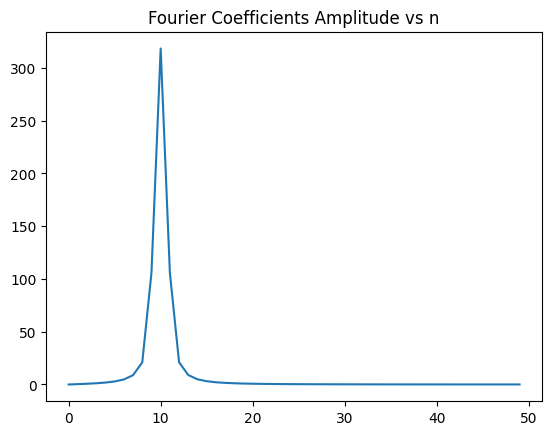

In [ ]:
# Number 2

import matplotlib.pyplot as plt # We import matplotlib.pyplot for our plots.

fig, ax = plt.subplots() # We create fig and ax objects.
FT_Coefficients = ax.plot(n[0:50], c_k[0:50]) # We plot the fourier coefficients. We choose the x-axis to cutoff > 50, since this is the only relevant region from observation.

ax.set(title = 'Fourier Coefficients Amplitude vs n') # We set the title of the plot for easier readability.

print("Notice the sharp peak at n=10. This tells us that the frequencies concentrated around n=10.")

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

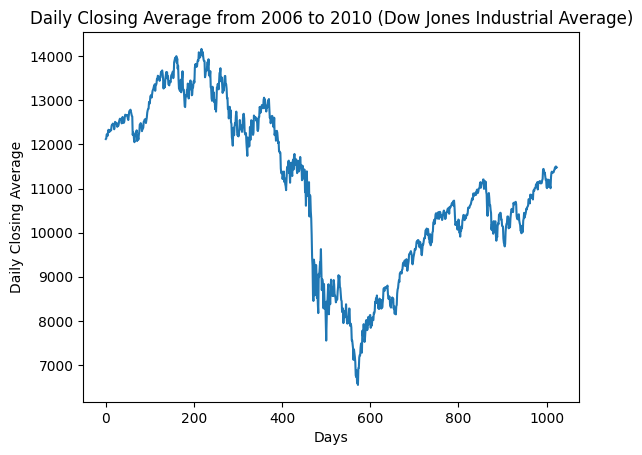

In [ ]:
# Number 1

import matplotlib.pyplot as plt # We import the matplotlib.pyplot library since we will need it to display plots.

days = np.arange(len(dow)) # We initialize the array "days" to use as an x-axis. Its length must be equal to "dow", otherwise we cannot plot it.

fig, ax = plt.subplots() # We create fig, ax objects.

plot = ax.plot(days, dow) # We plot the values of dow against days.

ax.set_title("Daily Closing Average from 2006 to 2010 (Dow Jones Industrial Average)") # We set the title of the graph.
ax.set_xlabel("Days") # We set the x-label of the graph.
ax.set_ylabel("Daily Closing Average") # We set the y-label of the graph.

plt.show()

Length of dow: 1024
Terms in c: 513
Although the question doesn't demand it, let us plot the fourier coefficients to gain a better understanding of the situation.


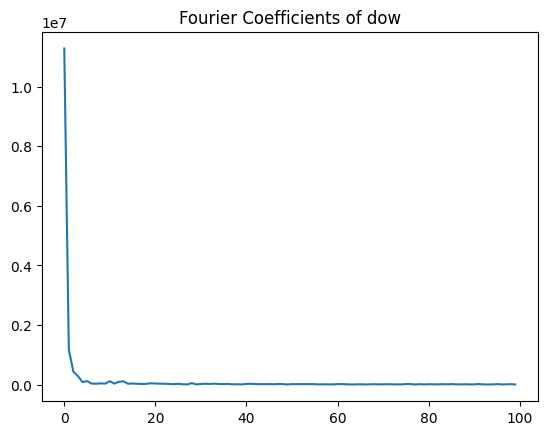

We see that the amplitudes are greater close to 0, and we get low amplitude high-frequency noise away from 0.


In [111]:
# Number 2

from numpy.fft import rfft # We import the rfft function as told by the question.

c = rfft(dow) # We find the fourier coefficients "c" of dow through the rfft function.

print("Length of dow: " + str(len(dow))) # We print the length of dow. This is to verify that the number of fourier coefficients are indeed (1/2)*N + 1.
print("Terms in c: " + str(len(c))) # We print the number of fouerier coefficients. It turns out to be 513, which is (1/2)*(1024) + 1, verifying the above.

print("Although the question doesn't demand it, let us plot the fourier coefficients to gain a better understanding of the situation.")

# Plotting the fourier coefficients

n = np.arange(len(c)) # We initialize an array n to use as the x-axis to display the fourier coefficients.

fig, ax = plt.subplots() # We initialize fig and ax objects.
plot = ax.plot(n[0:100], np.abs(c[0:100])) # We plot the fourier coefficients, choosing the x axis to run from 0 to 100.
ax.set_title("Fourier Coefficients of dow")

plt.show()

print("We see that the amplitudes are greater close to 0, and we get low amplitude high-frequency noise away from 0.")

Although the question doesn't demand it, let us try plotting the de-noised fourier coefficients.


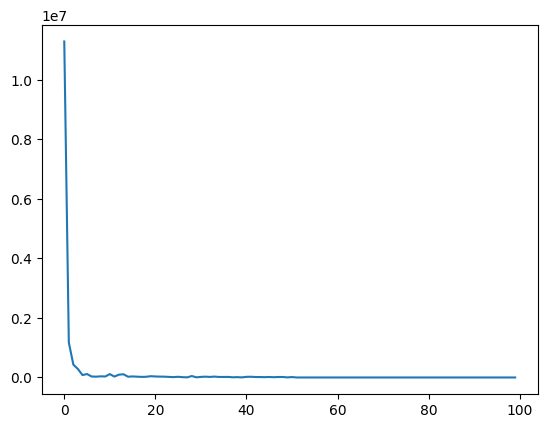

From the plot, we see that the noisy terms above ~50 are eliminated (It is hard to see, but in the previous graph there are noisy terms above ~50. Here, everything above 50 is perfectly smooth). Success!


In [110]:
# Number 3

c_cutoff = len(c) // 10 # We find a value for the length of 10% of the length of c. We will use this as an index later on.

# Using c_cutoff as an index, we can set all values that are not in the first 10% of elements equal to 0.

c[c_cutoff:] = 0 # Doing this eliminates the noise from the higher frequencies.

print("Although the question doesn't demand it, let us try plotting the de-noised fourier coefficients.")

# Plotting the de-noised fourier coefficients.

n = np.arange(len(c)) # We initialize an array to use as our x-values against the de-noised fourier coefficients.

fig, ax = plt.subplots() # We create fig and ax objects.
plot = ax.plot(n[0:100], np.abs(c[0:100])) # We plot the de-noised fourier coefficients. We choose the x-axis cutoff at 100.

plt.show()

print("From the plot, we see that the noisy terms above ~50 are eliminated (It is hard to see, but in the previous graph there are noisy terms above ~50. Here, everything above 50 is perfectly smooth). Success!")

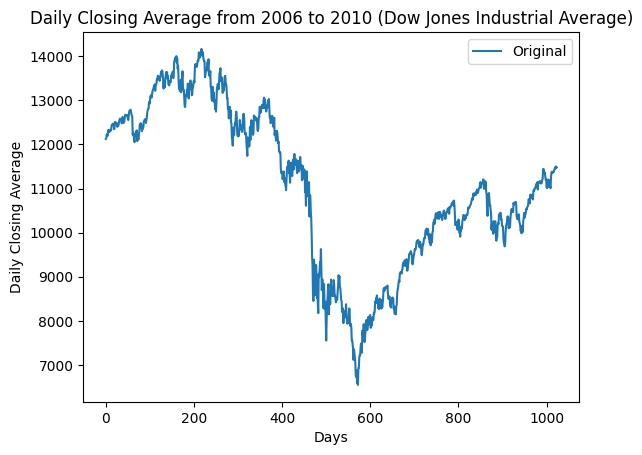

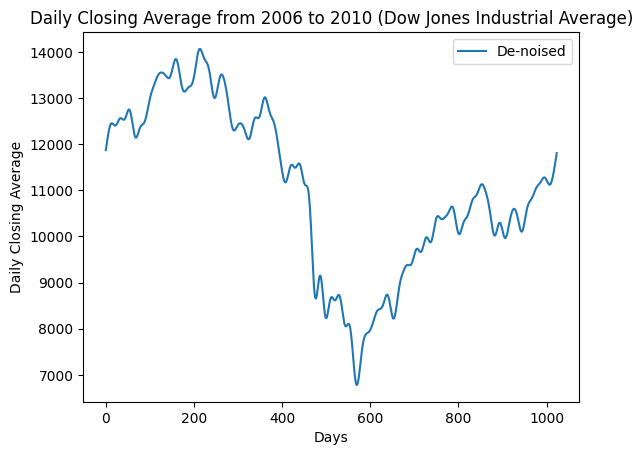

We see that the de-noising method works really well for smoothening out data. This method can be applied, for example, in economics for more accurate data analysis.


In [ ]:
# Number 4

from numpy.fft import irfft # We import the irfft function like the question asks.

dow_denoise = irfft(c) # We take the inverse fourier transform of the de-noised fourier coefficients to get the de-noised graph in the original space.

days = np.arange(len(dow_denoise)) # Again, we initialize the array "days" to use as an x-axis. Its length must be equal to "dow", otherwise we cannot plot it.

fig, ax = plt.subplots() # We create fig and ax objects.

plot_orig = ax.plot(days, dow, ls="-", label="Original") # We create a plot of the original, noisy graph.
ax.set_title("Daily Closing Average from 2006 to 2010 (Dow Jones Industrial Average)") # We set the title of the graph.
ax.set_xlabel("Days") # We set the x-label of the graph.
ax.set_ylabel("Daily Closing Average") # We set the y-label of the graph.

plt.legend()
plt.show()

fig1, ax1 = plt.subplots() # We create another plot to easily compare the original and de-noised graphs.

plot_denoise = ax1.plot(days, dow_denoise, label="De-noised") # We overlay a plot of the de-noised graph.
ax1.set_title("Daily Closing Average from 2006 to 2010 (Dow Jones Industrial Average)") # We set the title of the graph.
ax1.set_xlabel("Days") # We set the x-label of the graph.
ax1.set_ylabel("Daily Closing Average") # We set the y-label of the graph.

plt.legend()
plt.show()

print("We see that the de-noising method works really well for smoothening out data. This method can be applied, for example, in economics for more accurate data analysis.")

----------------
### Instructor Notes

What do these "noise" represent? Relate frequency filtering to the temporal domain in the real scale.
These are not necessarily unwanted signal but rather, they represent the daily fluctuations.

Your output lacks intensive discussion of the implications of your results